In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

### problem statement

to predict the class of wine

In [2]:
df=pd.read_csv("wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.shape

(178, 14)

In [4]:
df.duplicated().value_counts()

False    178
dtype: int64

In [5]:
data_dict={index : col_name for index,col_name in enumerate (df.columns)}
print(data_dict)

{0: 'Wine', 1: 'Alcohol', 2: 'Malic.acid', 3: 'Ash', 4: 'Acl', 5: 'Mg', 6: 'Phenols', 7: 'Flavanoids', 8: 'Nonflavanoid.phenols', 9: 'Proanth', 10: 'Color.int', 11: 'Hue', 12: 'OD', 13: 'Proline'}


### Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [9]:
df=df.rename({'Malic.acid':"Malic_acid",'Nonflavanoid.phenols':'Nonflavanoid_phenols','Color.int':'Color_int'},axis=1)

In [10]:
df.columns

Index(['Wine', 'Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

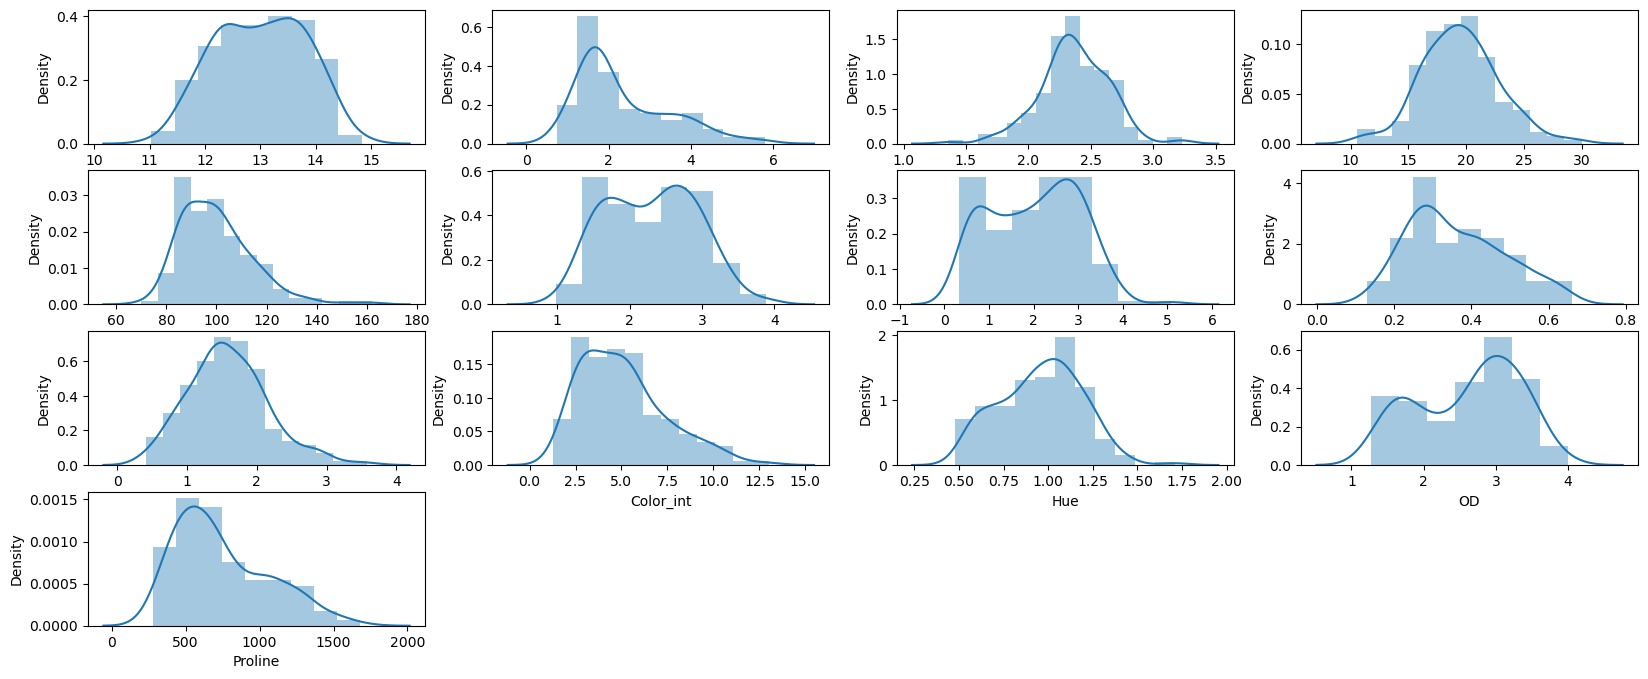

In [11]:
plt.figure(figsize=(20,8))
plt.title("visualaztion of numerical columns")
plt.subplot(4,4,1)
sns.distplot(df.Alcohol)
plt.subplot(4,4,2)
sns.distplot(df.Malic_acid)
plt.subplot(4,4,3)
sns.distplot(df.Ash)
plt.subplot(4,4,4)
sns.distplot(df.Acl)
plt.subplot(4,4,5)
sns.distplot(df.Mg)
plt.subplot(4,4,6)
sns.distplot(df.Phenols)
plt.subplot(4,4,7)
sns.distplot(df.Flavanoids)
plt.subplot(4,4,8)
sns.distplot(df.Nonflavanoid_phenols)
plt.subplot(4,4,9)
sns.distplot(df.Proanth)
plt.subplot(4,4,10)
sns.distplot(df.Color_int)
plt.subplot(4,4,11)
sns.distplot(df.Hue)
plt.subplot(4,4,12)
sns.distplot(df.OD)
plt.subplot(4,4,13)
sns.distplot(df.Proline)
plt.show()

In [12]:
from matplotlib import style

In [13]:
df.corr()

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<Axes: >

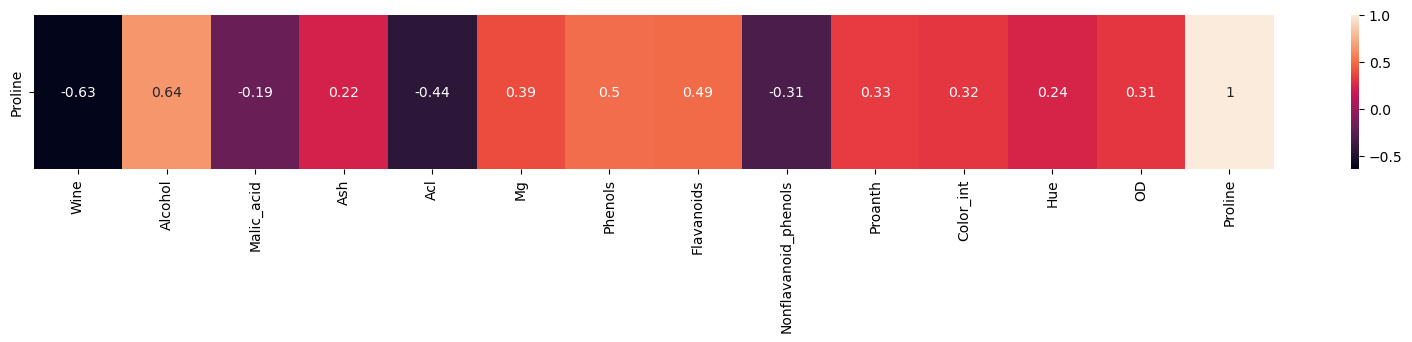

In [14]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().tail(1),annot=True)

# outliers

<Axes: >

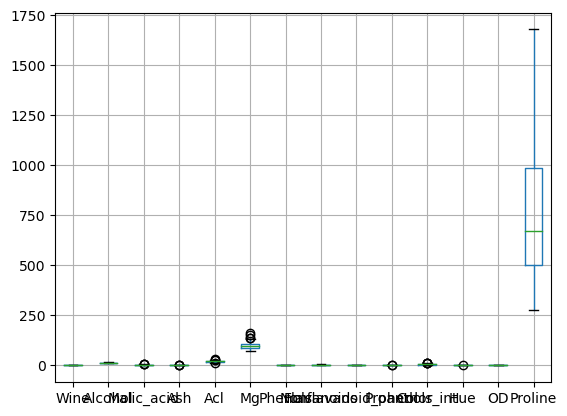

In [15]:
df.boxplot()

In [16]:
# Outliers Detection & Handling Using IQR Method:

def iqr(feature):
    q1 = np.percentile(feature, 25)
    q3 = np.percentile(feature, 75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return upper_bound, lower_bound

# Outliers Detection & Handling Using Z-Score Method:

def z_score(feature):
    mean = np.mean(feature)
    std = np.std(feature)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std
    return upper_limit, lower_limit

In [17]:
df.columns

Index(['Wine', 'Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

### Alcohol

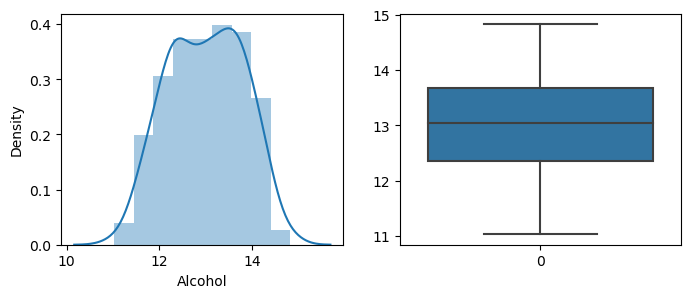

Skewness is: -0.051482331077134784


In [18]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Alcohol)
plt.subplot(1,2,2)
sns.boxplot(df.Alcohol)
plt.show()
print('Skewness is:', df.Alcohol.skew())


### Malic_acid

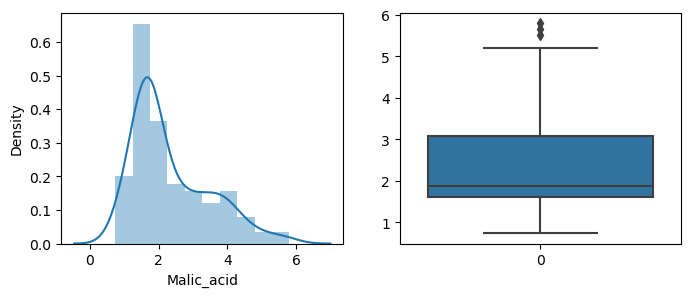

Skewness is: 1.0396511925814442


In [19]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Malic_acid)
plt.subplot(1,2,2)
sns.boxplot(df.Malic_acid)
plt.show()
print('Skewness is:', df.Malic_acid.skew())


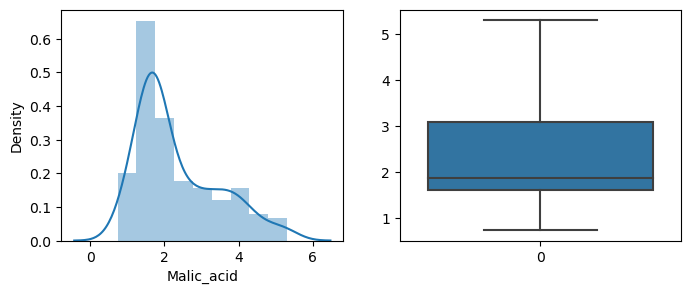

Skewness is: 0.969168752991994


In [20]:
# Using IQR Method
df.Malic_acid = np.where(df.Malic_acid > iqr(df.Malic_acid)[0], iqr(df.Malic_acid)[0], 
                          np.where(df.Malic_acid < iqr(df.Malic_acid)[1], iqr(df.Malic_acid)[1], 
                                   df.Malic_acid))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Malic_acid)
plt.subplot(1,2,2)
sns.boxplot(df.Malic_acid)
plt.show()
print('Skewness is:', df.Malic_acid.skew())


### Ash


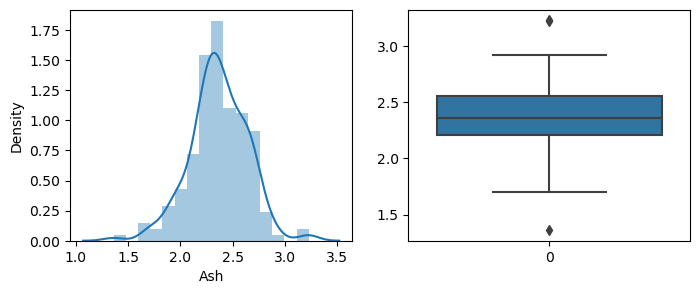

Skewness is: -0.17669931645735712


In [21]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Ash)
plt.subplot(1,2,2)
sns.boxplot(df.Ash)
plt.show()
print('Skewness is:', df.Ash.skew())


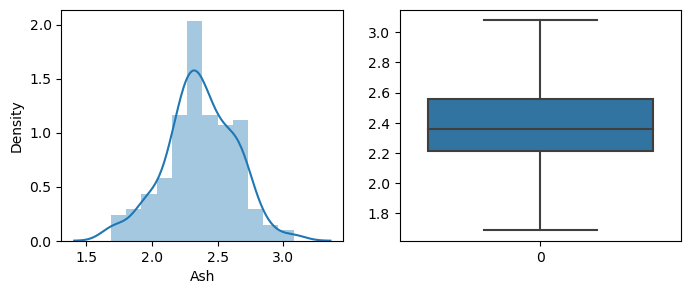

Skewness is: -0.14976370756337093


In [22]:
# Using IQR Method
df.Ash = np.where(df.Ash > iqr(df.Ash)[0], iqr(df.Ash)[0], 
                          np.where(df.Ash < iqr(df.Ash)[1], iqr(df.Ash)[1], 
                                   df.Ash))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Ash)
plt.subplot(1,2,2)
sns.boxplot(df.Ash)
plt.show()
print('Skewness is:', df.Ash.skew())


### Acl

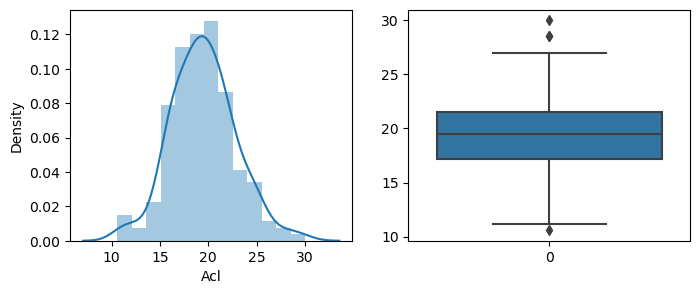

Skewness is: 0.21304688642645586


In [23]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Acl)
plt.subplot(1,2,2)
sns.boxplot(df.Acl)
plt.show()
print('Skewness is:', df.Acl.skew())


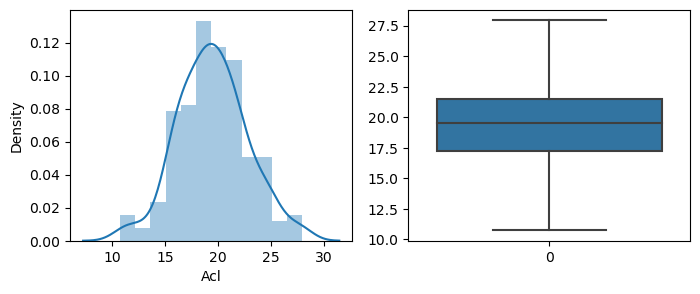

Skewness is: 0.11479754061723806


In [24]:
# Using IQR Method
df.Acl = np.where(df.Acl > iqr(df.Acl)[0], iqr(df.Acl)[0], 
                          np.where(df.Acl < iqr(df.Acl)[1], iqr(df.Acl)[1], 
                                   df.Acl))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Acl)
plt.subplot(1,2,2)
sns.boxplot(df.Acl)
plt.show()
print('Skewness is:', df.Acl.skew())


### Mg

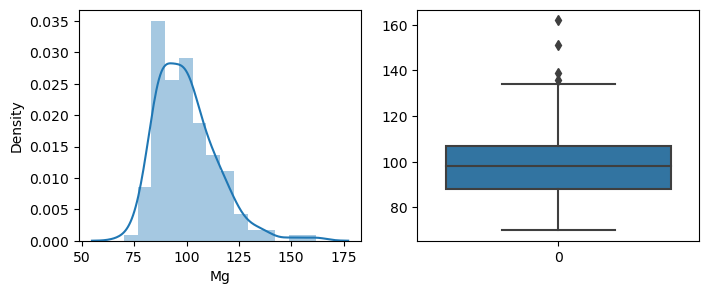

Skewness is: 1.098191054755161


In [25]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Mg)
plt.subplot(1,2,2)
sns.boxplot(df.Mg)
plt.show()
print('Skewness is:', df.Mg.skew())


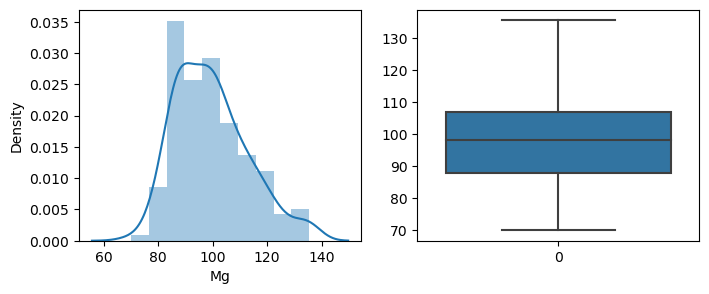

Skewness is: 0.6708091123987314


In [26]:
# Using IQR Method
df.Mg = np.where(df.Mg > iqr(df.Mg)[0], iqr(df.Mg)[0], 
                          np.where(df.Mg < iqr(df.Mg)[1], iqr(df.Mg)[1], 
                                   df.Mg))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Mg)
plt.subplot(1,2,2)
sns.boxplot(df.Mg)
plt.show()
print('Skewness is:', df.Mg.skew())


### Phenols

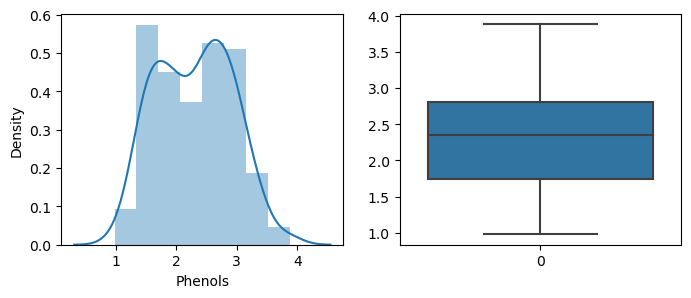

Skewness is: 0.08663858640245253


In [27]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Phenols)
plt.subplot(1,2,2)
sns.boxplot(df.Phenols)
plt.show()
print('Skewness is:', df.Phenols.skew())


### Flavanoids

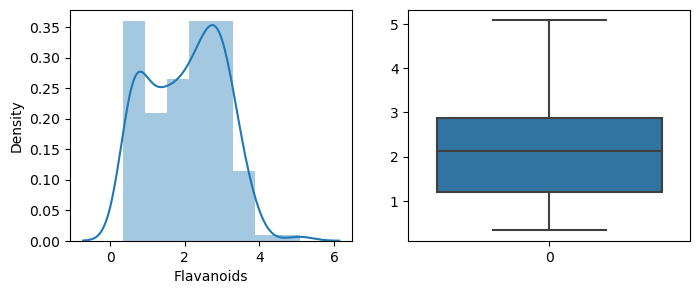

Skewness is: 0.02534355338149103


In [28]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Flavanoids)
plt.subplot(1,2,2)
sns.boxplot(df.Flavanoids)
plt.show()
print('Skewness is:', df.Flavanoids.skew())


### Nonflavanoid_phenols

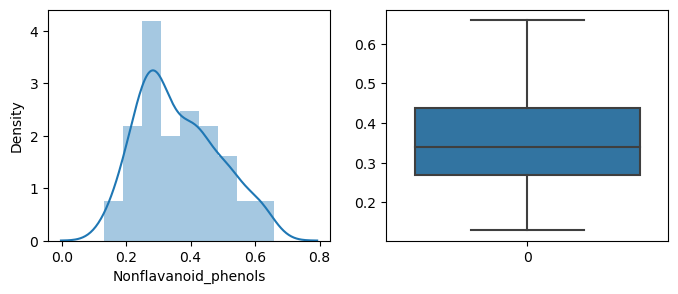

Skewness is: 0.4501513355621236


In [29]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Nonflavanoid_phenols)
plt.subplot(1,2,2)
sns.boxplot(df.Nonflavanoid_phenols)
plt.show()
print('Skewness is:', df.Nonflavanoid_phenols.skew())


### Proanth

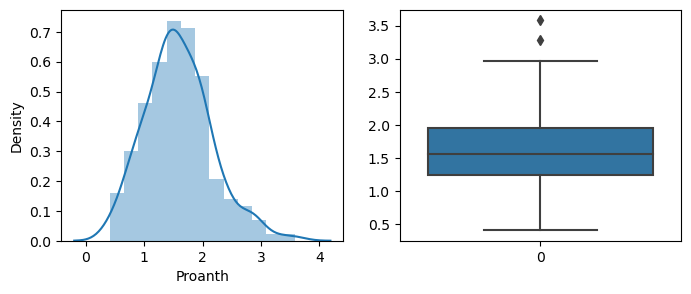

Skewness is: 0.5171371722998975


In [30]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Proanth)
plt.subplot(1,2,2)
sns.boxplot(df.Proanth)
plt.show()
print('Skewness is:', df.Proanth.skew())


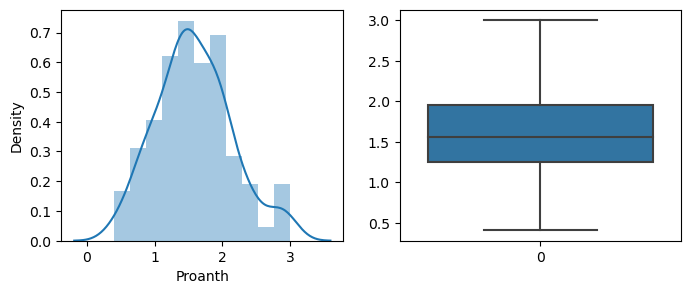

Skewness is: 0.35081104824530923


In [31]:
# Using IQR Method
df.Proanth = np.where(df.Proanth > iqr(df.Proanth)[0], iqr(df.Proanth)[0], 
                          np.where(df.Proanth < iqr(df.Proanth)[1], iqr(df.Proanth)[1], 
                                   df.Proanth))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Proanth)
plt.subplot(1,2,2)
sns.boxplot(df.Proanth)
plt.show()
print('Skewness is:', df.Proanth.skew())


### Color_int

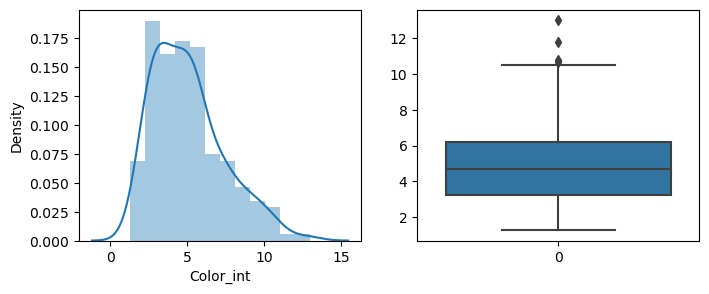

Skewness is: 0.8685847909572548


In [32]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Color_int)
plt.subplot(1,2,2)
sns.boxplot(df.Color_int)
plt.show()
print('Skewness is:', df.Color_int.skew())


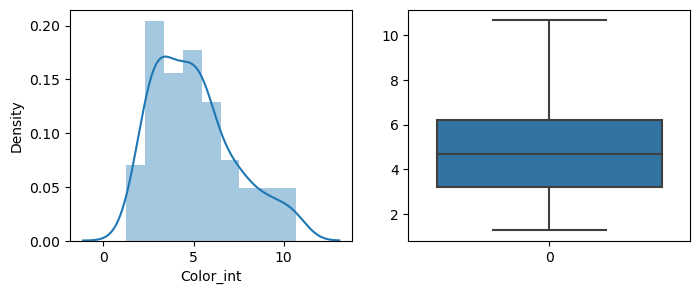

Skewness is: 0.7354534491793365


In [33]:
# Using IQR Method
df.Color_int = np.where(df.Color_int > iqr(df.Color_int)[0], iqr(df.Color_int)[0], 
                          np.where(df.Color_int < iqr(df.Color_int)[1], iqr(df.Color_int)[1], 
                                   df.Color_int))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Color_int)
plt.subplot(1,2,2)
sns.boxplot(df.Color_int)
plt.show()
print('Skewness is:', df.Color_int.skew())


### Hue

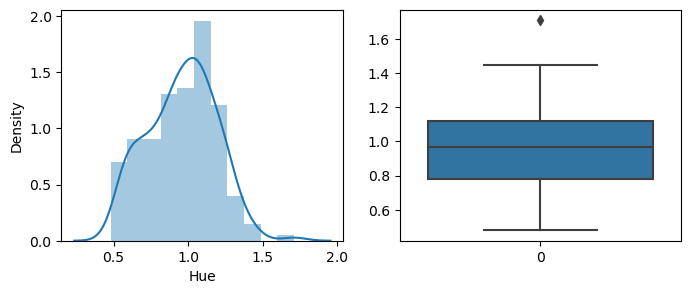

Skewness is: 0.021091272199709302


In [34]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Hue)
plt.subplot(1,2,2)
sns.boxplot(df.Hue)
plt.show()
print('Skewness is:', df.Hue.skew())


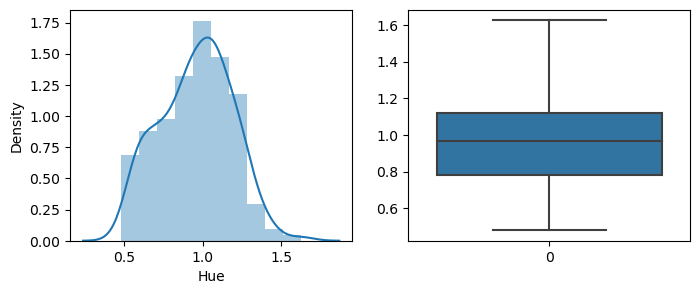

Skewness is: -0.03418995257290671


In [35]:
# Using IQR Method
df.Hue = np.where(df.Hue > iqr(df.Hue)[0], iqr(df.Hue)[0], 
                          np.where(df.Hue < iqr(df.Hue)[1], iqr(df.Hue)[1], 
                                   df.Hue))
# After Handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Hue)
plt.subplot(1,2,2)
sns.boxplot(df.Hue)
plt.show()
print('Skewness is:', df.Hue.skew())


### OD

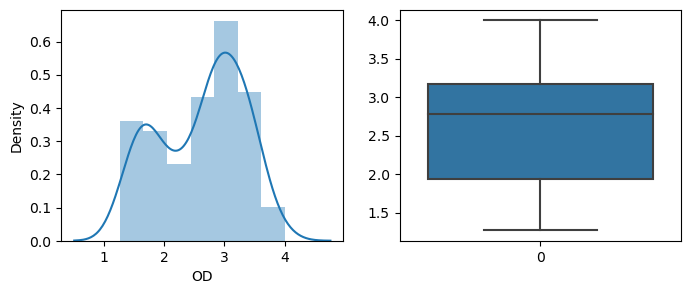

Skewness is: -0.30728549895848106


In [36]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.OD)
plt.subplot(1,2,2)
sns.boxplot(df.OD)
plt.show()
print('Skewness is:', df.OD.skew())


### Proline

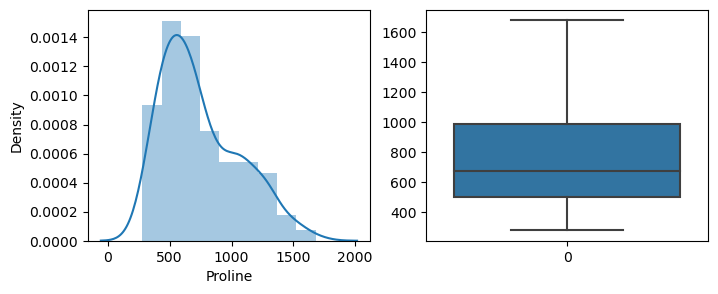

Skewness is: 0.7678217813897322


In [37]:
# Checking Normal Distribution & Skewness before handling Outliers
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
sns.distplot(df.Proline)
plt.subplot(1,2,2)
sns.boxplot(df.Proline)
plt.show()
print('Skewness is:', df.Proline.skew())


<Axes: >

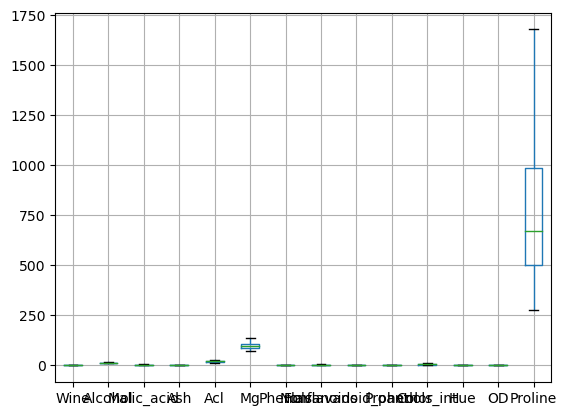

In [38]:
df.boxplot()

In [39]:
df

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [40]:
df.corr()

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
Wine,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic_acid,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Acl,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Mg,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanth,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


<Axes: >

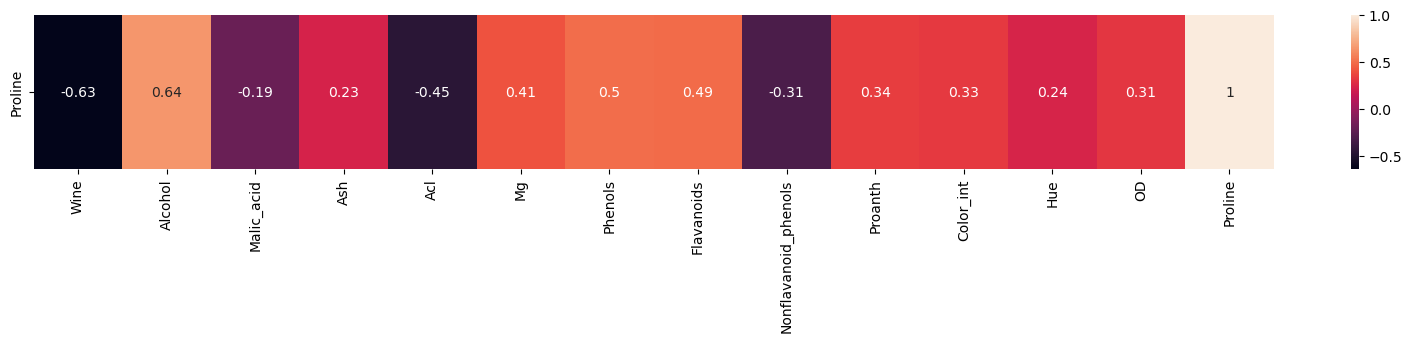

In [41]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().tail(1),annot=True)

In [42]:
x=df.drop('Wine',axis=1)
y=df['Wine']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [44]:
logestic_clf=LogisticRegression()

In [45]:
logestic_clf.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=logestic_clf.predict(x_test)

In [47]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)
print("*"*40)

testing_accuracy=accuracy_score(y_test,y_pred)
print("tesing accuracy: ",testing_accuracy)
print("*"*40)

clf_report=classification_report(y_test,y_pred)
print("classification_report:\n ",clf_report)
print("*"*40)

confusion matrix: 
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]
****************************************
tesing accuracy:  0.9722222222222222
****************************************
classification_report:
                precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.93      0.96        14
           3       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

****************************************


In [48]:
y_pred_train=logestic_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)
print("*"*40)

training_accuracy=accuracy_score(y_train,y_pred_train)
print("training accuracy: ",training_accuracy)
print("*"*40)

clf_report=classification_report(y_train,y_pred_train)
print("classification_report:\n ",clf_report)
print("*"*40)

confusion matrix: 
 [[44  3  0]
 [ 0 56  1]
 [ 0  0 38]]
****************************************
training accuracy:  0.971830985915493
****************************************
classification_report:
                precision    recall  f1-score   support

           1       1.00      0.94      0.97        47
           2       0.95      0.98      0.97        57
           3       0.97      1.00      0.99        38

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142

****************************************


In [49]:
scores=cross_val_score(logestic_clf,x_train,y_train)
print("cross validation score: ",scores)

cross validation score:  [1.         0.93103448 1.         0.92857143 0.96428571]


### Single Row Tesing

In [51]:
x_test[20:21].T

,8
Alcohol,14.83
Malic_acid,1.64
Ash,2.17
Acl,14.00
Mg,97.00
Phenols,2.80
Flavanoids,2.98
Nonflavanoid_phenols,0.29
Proanth,1.98
Color_int,5.20


In [61]:
Alcohol=14.83
Malic_acid=1.64
Ash=9.17
Acl=14.00
Mg=97.00
Phenols=42.80
Flavanoids=27.98
Nonflavanoid_phenols=7.29
Proanth=1.98
Color_int=7.20
Hue=1.08
OD=8.85
Proline=4554.00


test_array=np.array([Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids
                     ,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline],ndmin=2)

predicted_class=logestic_clf.predict(test_array)
print("predicted_class is : ",predicted_class)

predicted_class is :  [1]


In [63]:
with open("wine_logistic_regression.pkl",'wb') as f:
    pickle.dump(logestic_clf,f)